In [651]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [652]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
data = wine.data.features
data['class'] = wine.data.targets

Первые 5 строк

In [653]:
data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Последние 5 строк

In [654]:
data.tail()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [655]:
data['class'].value_counts().keys()

Index([2, 1, 3], dtype='int64', name='class')

In [656]:
values = list(data['class'].value_counts())
colors = ['green', 'red', 'blue']
labels = ['Group ' + str(i) for i in list(dict(data['class'].value_counts()).keys())]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

Видим, что больше всего вина группы 2, меньше всего 3.

Выводим общую информацию о датасете

In [657]:
# Выводим количество образцов
print("Количество образцов (строк):", data.shape[0])
print("Количество образцов (столбцов):", data.shape[1])
data.describe()

Количество образцов (строк): 178
Количество образцов (столбцов): 14


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Анализ каждого признака в отдельности

## Alcohol

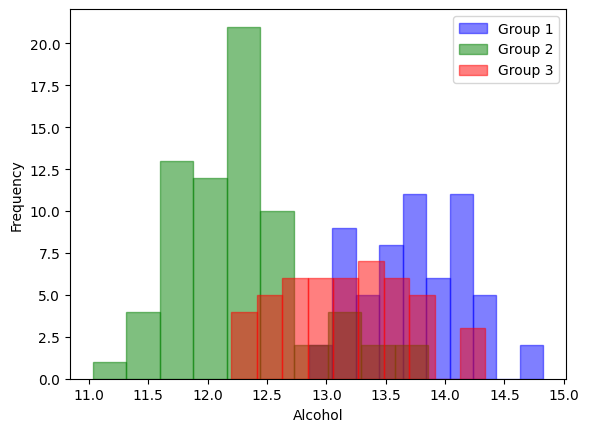

In [658]:
x1 = data[data['class'] == 1]['Alcohol']
x2 = data[data['class'] == 2]['Alcohol']
x3 = data[data['class'] == 3]['Alcohol']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r')

plt.ylabel('Frequency')
plt.xlabel('Alcohol')
plt.legend()
plt.show()

Распределение количества вин в завивимости от процента алкоголя в них. По графику видно, что разные сорта вин имеют разные распределения по проценту алкоголя, то есть по этому признаку можно с какой-то точнотью определять вид вина.

## Malicacid

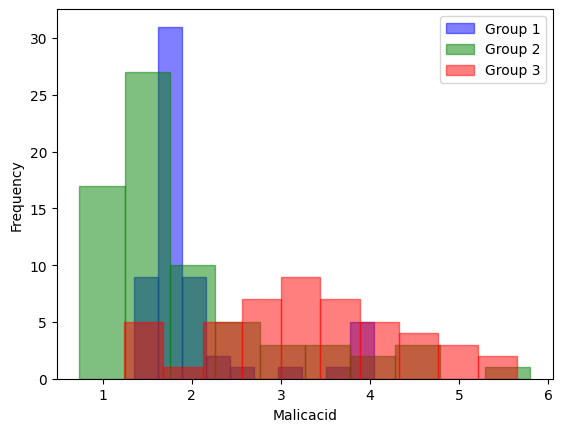

In [659]:
x1 = data[data['class'] == 1]['Malicacid']
x2 = data[data['class'] == 2]['Malicacid']
x3 = data[data['class'] == 3]['Malicacid']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r')

plt.ylabel('Frequency')
plt.xlabel('Malicaсid')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества Яблочной кислоты. Группы 2 и 1 схожи по распредлению, однако 3 группа заметно отличается.

## Ash

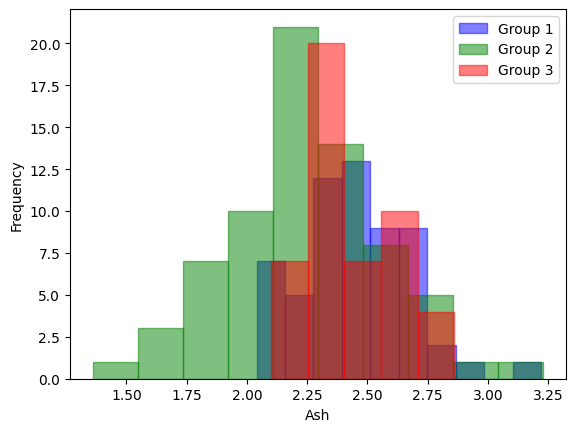

In [660]:
x1 = data[data['class'] == 1]['Ash']
x2 = data[data['class'] == 2]['Ash']
x3 = data[data['class'] == 3]['Ash']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Ash')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества шлаков. Распределения очень похожи, поэтому видимо по этому признаку сложно делать предсказания.

## Alcalinity_of_ash

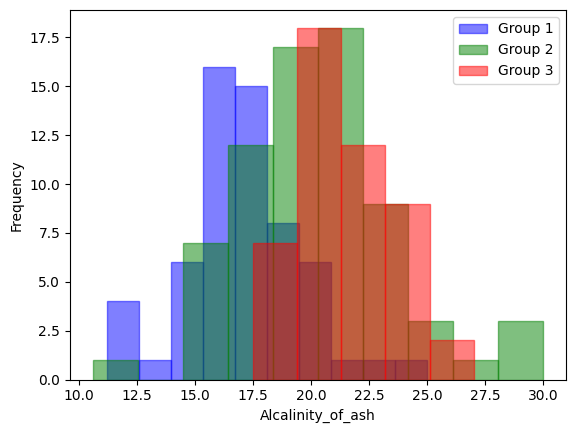

In [661]:
x1 = data[data['class'] == 1]['Alcalinity_of_ash']
x2 = data[data['class'] == 2]['Alcalinity_of_ash']
x3 = data[data['class'] == 3]['Alcalinity_of_ash']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Alcalinity_of_ash')
plt.legend()
plt.show()

Распределение количества вин в завивимости от щелочность золы. Распределения очень похожи, поэтому видимо по этому признаку сложно делать предсказания.

## Magnesium

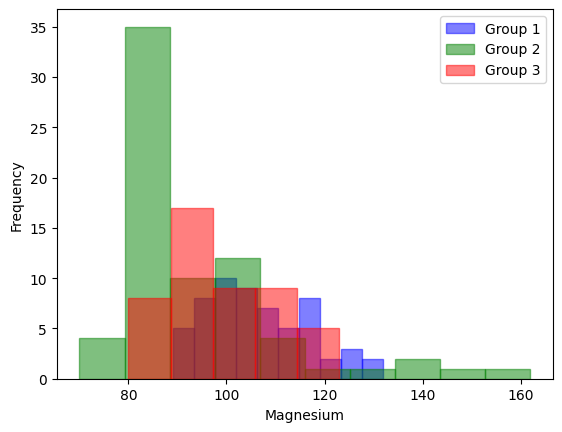

In [662]:
x1 = data[data['class'] == 1]['Magnesium']
x2 = data[data['class'] == 2]['Magnesium']
x3 = data[data['class'] == 3]['Magnesium']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Magnesium')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества магния. Распределения очень похожи, поэтому видимо по этому признаку сложно делать предсказания.

## Total_phenols

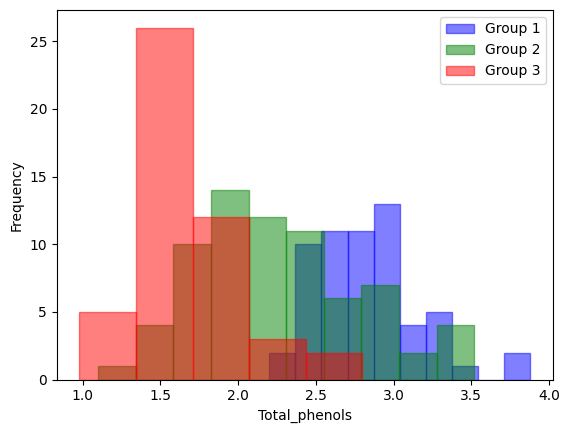

In [663]:
x1 = data[data['class'] == 1]['Total_phenols']
x2 = data[data['class'] == 2]['Total_phenols']
x3 = data[data['class'] == 3]['Total_phenols']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Total_phenols')
plt.legend()
plt.show()

Распределение количества вин в завивимости от полного количества фенолов в них. По графику видно, что разные сорта вин имеют разные распределения, то есть по этому признаку можно с какой-то точнотью определять вид вина.

## Flavanoids

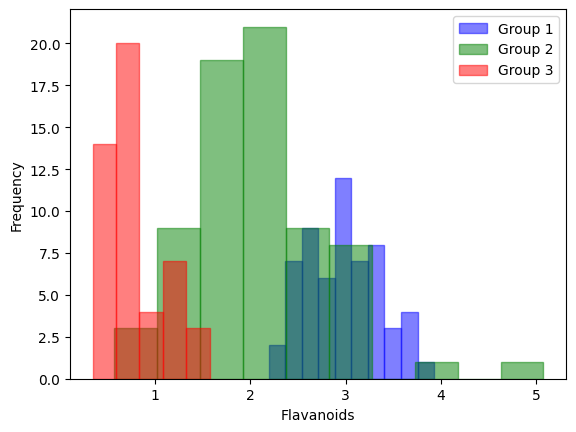

In [664]:
x1 = data[data['class'] == 1]['Flavanoids']
x2 = data[data['class'] == 2]['Flavanoids']
x3 = data[data['class'] == 3]['Flavanoids']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Flavanoids')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества флаваноидов. По графику видно, что разные сорта вин имеют разные распределения, то есть по этому признаку можно с какой-то точнотью определять вид вина.

## Nonflavanoid_phenols

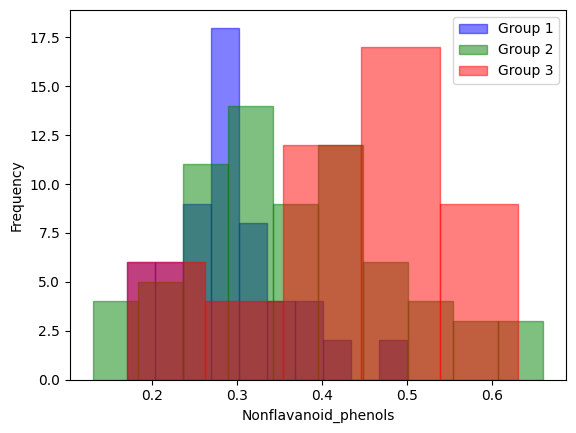

In [665]:
x1 = data[data['class'] == 1]['Nonflavanoid_phenols']
x2 = data[data['class'] == 2]['Nonflavanoid_phenols']
x3 = data[data['class'] == 3]['Nonflavanoid_phenols']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Nonflavanoid_phenols')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества нефлаваноидных фенолов. 1 и 2 имеют одинаковое мат ожидание, разную дисперсию, поэтому этот признак тоже является полезным для классификации.

## Proanthocyanins

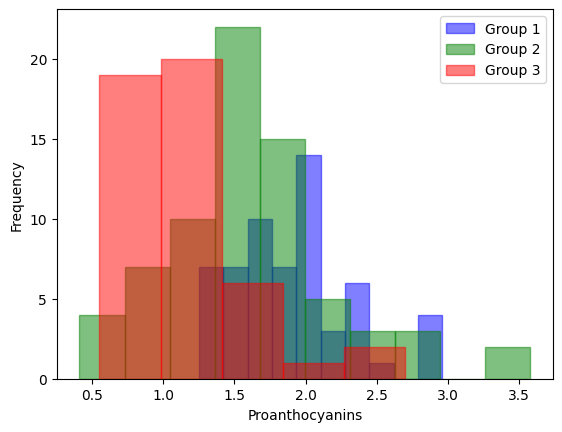

In [666]:
x1 = data[data['class'] == 1]['Proanthocyanins']
x2 = data[data['class'] == 2]['Proanthocyanins']
x3 = data[data['class'] == 3]['Proanthocyanins']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Proanthocyanins')
plt.legend()
plt.show()

Распределение количества вин в завивимости от количества проантоцианы. 1 и 2 имеют очень похожие распределения, однако 3 отличается.

## Color_intensity

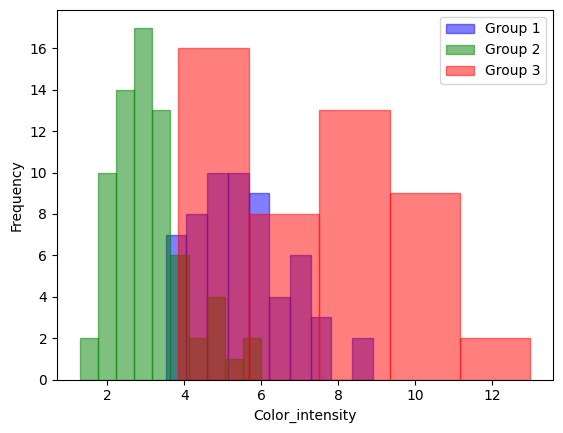

In [667]:
x1 = data[data['class'] == 1]['Color_intensity']
x2 = data[data['class'] == 2]['Color_intensity']
x3 = data[data['class'] == 3]['Color_intensity']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Color_intensity')
plt.legend()
plt.show()

Распределение количества вин в завивимости от насыщенности цвета. По графику видно, что разные сорта вин имеют разные распределения, то есть по этому признаку можно с хорошей точностью определять вид вина.

## Hue

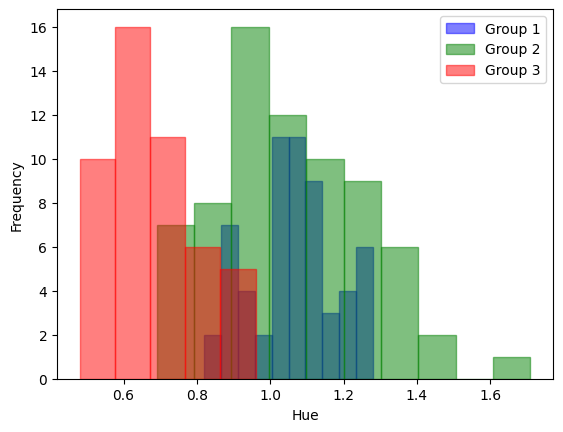

In [668]:
x1 = data[data['class'] == 1]['Hue']
x2 = data[data['class'] == 2]['Hue']
x3 = data[data['class'] == 3]['Hue']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Hue')
plt.legend()
plt.show()

Распределение количества вин в завиcимости от оттенка. По данному признаку можно легко определить 3 вид.

## 0D280_0D315_of_diluted_wines

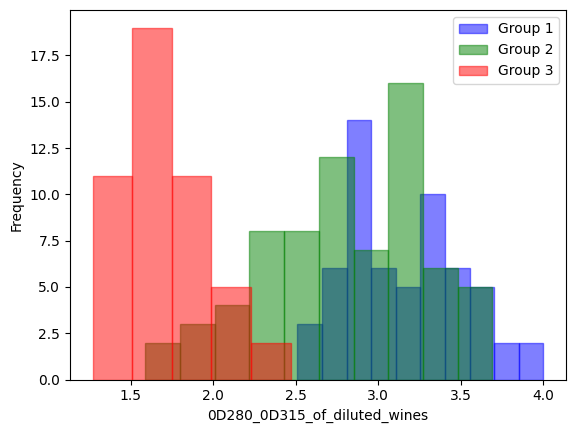

In [669]:
x1 = data[data['class'] == 1]['0D280_0D315_of_diluted_wines']
x2 = data[data['class'] == 2]['0D280_0D315_of_diluted_wines']
x3 = data[data['class'] == 3]['0D280_0D315_of_diluted_wines']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('0D280_0D315_of_diluted_wines')
plt.legend()
plt.show()

Распределение количества вин в завиcимости от оттенка. По данному признаку можно легко определить 3 вид, с большой ошибкой разделить 1 и 2.

## Proline

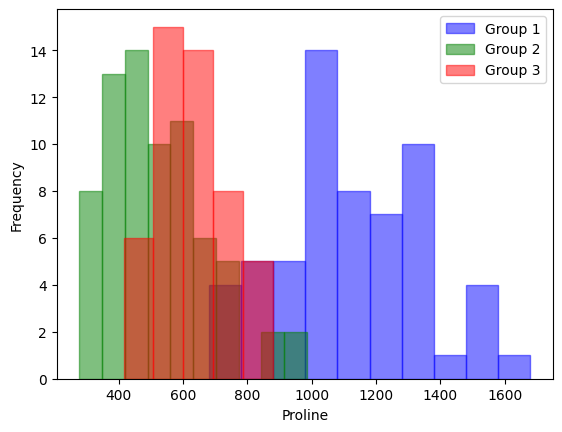

In [670]:
x1 = data[data['class'] == 1]['Proline']
x2 = data[data['class'] == 2]['Proline']
x3 = data[data['class'] == 3]['Proline']

plt.hist(x1, label='Group 1', alpha=0.5, color = 'b', edgecolor='b')
plt.hist(x2, label='Group 2', alpha=0.5, color = 'g', edgecolor='g')
plt.hist(x3, label='Group 3', alpha=0.5, color = 'r', edgecolor='r', bins = 5)

plt.ylabel('Frequency')
plt.xlabel('Proline')
plt.legend()
plt.show()

Распределение количества вин в завиcимости от количества пролина. По данному признаку можно легко определить 1 вид, с ошибкой разделить 3 и 2.

## Выводы по анализу признаков

Таким образом, к "хорошим" признакам отнесем Alcohol, Malicacid (по 3), Total_phenols, Flavanoids (очень хороший), Nonflavanoid_phenols (по 3), Proanthocyanins (по 3), Color_intensity (по 2), Hue (по 3), 0D280_0D315_of_diluted_wines (по 3), Proline (по всем, но особенно по 1)

# Корелляция

Матрица корреляций

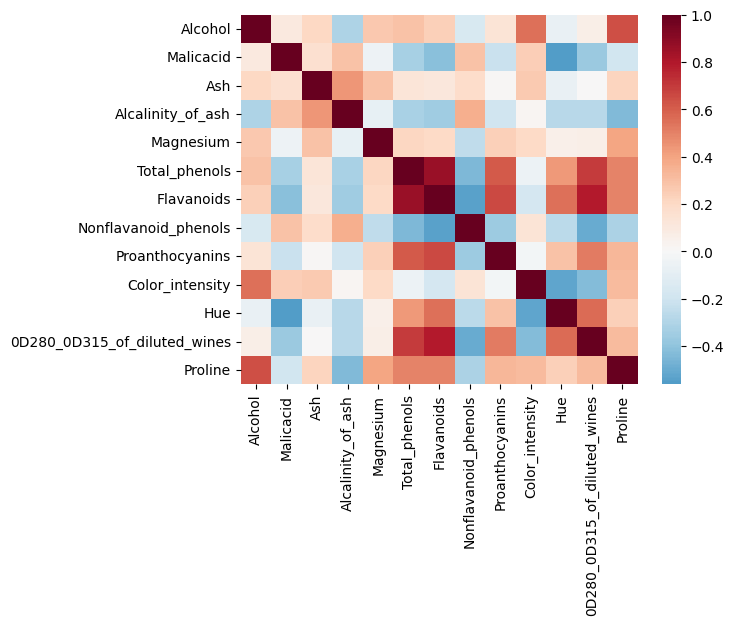

In [671]:
corr = data.drop(columns=['class']).corr()
ax = sns.heatmap(corr, center=0, cmap="RdBu_r")

In [672]:
corr = data.drop(columns=['class']).corr()
corr['max'] = corr[corr != 1].abs().max()
corr['min'] = corr[corr != 1].abs().min()
corr['imax'] = corr[corr != 1].abs().idxmax()
corr['imin'] = corr[corr != 1].drop(columns=['imax']).abs().idxmin()
corr

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,max,min,imax,imin
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.643720,0.071747,Proline,Hue
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.561296,0.054575,Hue,Magnesium
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.443367,0.003911,Alcalinity_of_ash,0D280_0D315_of_diluted_wines
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.443367,0.018732,Ash,Color_intensity
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.393351,0.054575,Proline,Malicacid
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.864564,0.055136,Flavanoids,Color_intensity
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.864564,0.115077,Total_phenols,Ash
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.537900,0.139057,Flavanoids,Color_intensity
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.652692,0.009652,Flavanoids,Ash
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.546364,0.018732,Alcohol,Alcalinity_of_ash


Самыми кореллирующими признаками являются Total_phenols И Flavanoids

<Axes: xlabel='Total_phenols', ylabel='Flavanoids'>

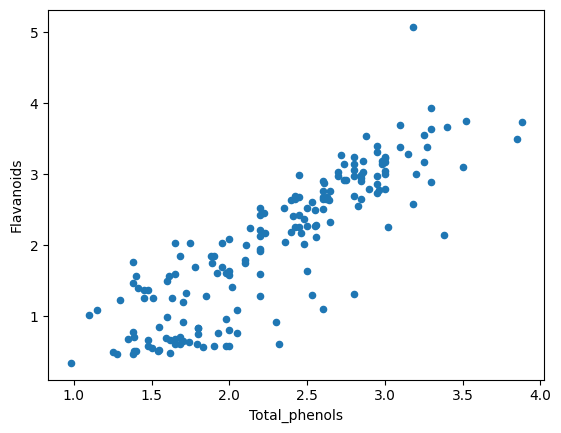

In [673]:
data.plot('Total_phenols', 'Flavanoids', kind='scatter')

Невооруженным взглядом видна линейная завивимость параметров.

Самыми некореллирующими являются 0D280_0D315_of_diluted_wines и Ash

<Axes: xlabel='0D280_0D315_of_diluted_wines', ylabel='Ash'>

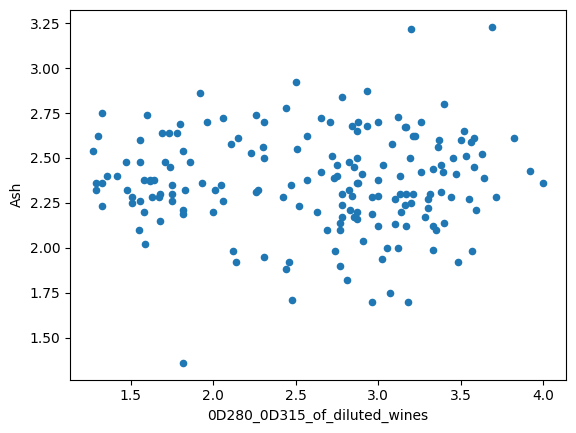

In [674]:
data.plot('0D280_0D315_of_diluted_wines', 'Ash', kind='scatter')

# Построение модели

In [675]:
y = data['class']
X = data.drop(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

Модель для кореллирующих признаков

In [676]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(X_train[['Total_phenols', 'Flavanoids']], y_train);
y_pred = clf.predict(X_test[['Total_phenols', 'Flavanoids']])
print("Train accuracy", clf.score(X_train[['Total_phenols', 'Flavanoids']], y_train))
print("Test accuracy", clf.score(X_test[['Total_phenols', 'Flavanoids']], y_test))

Train accuracy 0.8802816901408451
Test accuracy 0.8333333333333334


In [677]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 2, 14,  0],
       [ 0,  4,  8]], dtype=int64)

In [678]:
report = metrics.classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       0.78      0.88      0.82        16
           3       1.00      0.67      0.80        12

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.84        36
weighted avg       0.86      0.83      0.83        36



Модель для некореллирующих признаков

In [679]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=1e-1)
clf.fit(X_train[['0D280_0D315_of_diluted_wines', 'Ash']], y_train);
y_pred = clf.predict(X_test[['0D280_0D315_of_diluted_wines', 'Ash']])
print("Train accuracy", clf.score(X_train[['0D280_0D315_of_diluted_wines', 'Ash']], y_train))
print("Test accuracy", clf.score(X_test[['0D280_0D315_of_diluted_wines', 'Ash']], y_test))


Train accuracy 0.8309859154929577
Test accuracy 0.8333333333333334


In [680]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 5,  3,  0],
       [ 2, 14,  0],
       [ 0,  1, 11]], dtype=int64)

In [681]:
report = metrics.classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.71      0.62      0.67         8
           2       0.78      0.88      0.82        16
           3       1.00      0.92      0.96        12

    accuracy                           0.83        36
   macro avg       0.83      0.81      0.82        36
weighted avg       0.84      0.83      0.83        36



Обе модели отработали практически одинаково. Подбирал максимальную точность по глубине дерева и минимальному шагу. 

# Построение RandomForest

In [682]:
from sklearn.ensemble import RandomForestClassifier

In [683]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy", clf.score(X_test, y_test))

Train accuracy 1.0
Test accuracy 1.0


In [684]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 12]], dtype=int64)

In [685]:
report = metrics.classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Тут анализировать особо нечего, абсолютная точность

In [686]:
from sklearn.metrics import roc_curve

In [687]:
clfTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=1e-1)
clfTree.fit(X_train[['0D280_0D315_of_diluted_wines', 'Ash']], y_train);

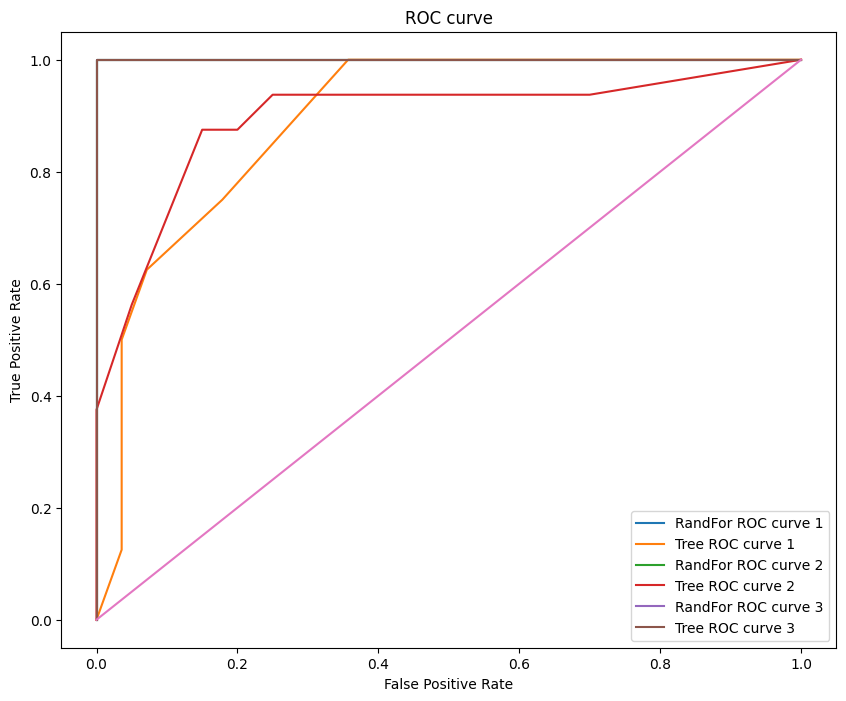

(array([0.        , 0.41666667, 0.91666667, 1.        , 1.        ,
        1.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.29166667,
        1.        ]))

In [691]:
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,i], pos_label=i+1)
    plt.plot(fpr, tpr, label=f'RandFor ROC curve {i+1}')
    fpr, tpr, thresholds = roc_curve(y_test, clfTree.predict_proba(X_test[['0D280_0D315_of_diluted_wines', 'Ash']])[:,i], pos_label=i+1)
    plt.plot(fpr, tpr, label=f'Tree ROC curve {i+1}')
plt.plot([0, 1], [0, 1])
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# plt.xlim(-0.01,0.02)
plt.legend()
plt.show()
tpr, fpr

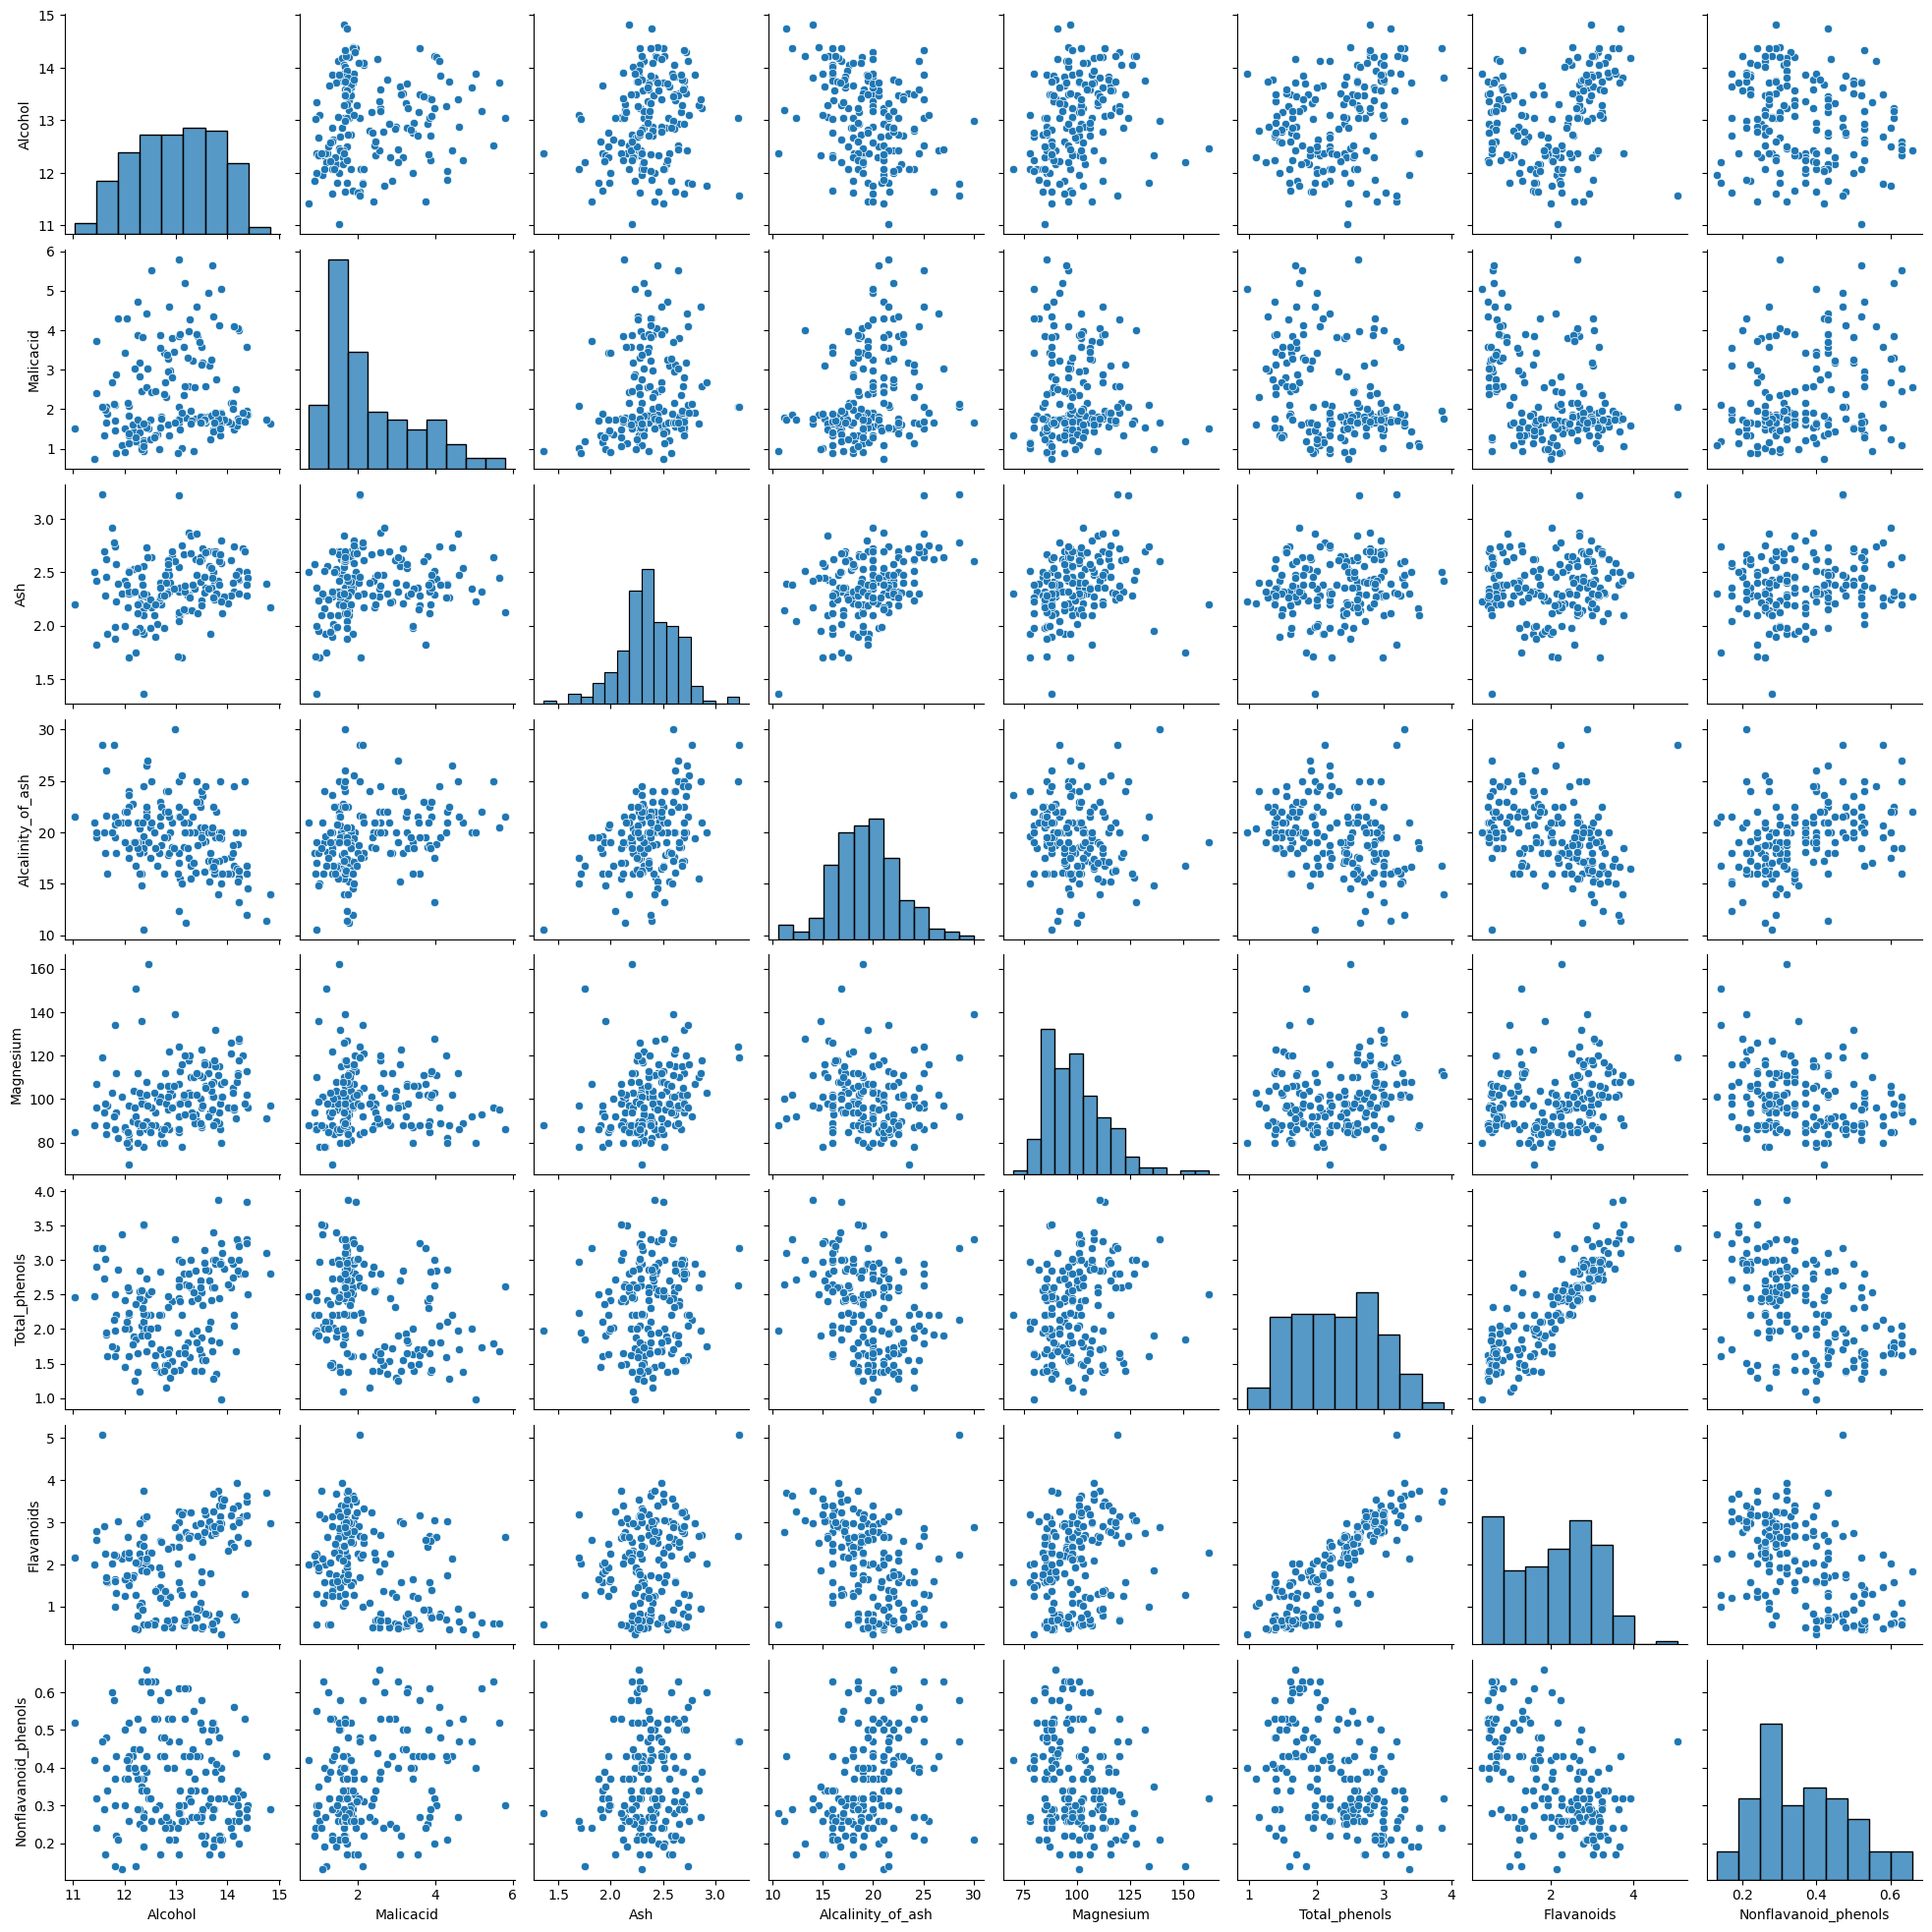

In [689]:
cols = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols']
sns.pairplot(X[cols])